# El modelo SIS

Analizaremos uno de los casos más generales del modelo SIS, el modelo en el que se consideran las muertas causadas por la enfermedad junto con la natalidad y mortalidad de la población. En este modelo se consideran 2 posibles estados, susceptibles (S) e infectados (I).

Las variaciones entre estados vienen dadas por los nuevos contagios y los individuos que se recuperan de la enfermedad, adicionalmente cada estado se ve afectado por los parámetros que describen la natalidad/mortalidad y la muerte a cauda de la enfermedad. Los diferentes estados del modelo se pueden apreciar en el siguiente diagrama:

![texto del enlace](Imagenes/SIS_compartimientos.PNG)

En nuestro caso consideraremos una población de tamaño constante y normalizado, por lo que $S + I = 1$ y en consecuencia $S' + I' = 0$.

Típicamente cuando se habla de modelos epidemiológicos con muerte por enfermedad se consideran 4 parámetros: la tasa de infección $\beta$ que representa la probabilidad que tiene un individuo susceptible de adquirir la enfermedad luego de un contagio con un infectado, la tasa de recuperación $\alpha$ que se puede entender como la probabilidad de que un infectado se recupere de la enfermedad, la tasa de natalidad/mortalidad $\mu$ que en el caso de los modelos clásicos se considera igual y finalmente la tasa de muerte por enfermedad $\theta$.

Podemos describir el modelo a partir de un sistema de ecuaciones diferenciales como sigue:

\begin{equation}
\left\{
\begin{array}{l}
S' = \mu(1 - S) + (1 - \theta)\alpha I - \beta S I \\
I' = \beta S I - (1 - \theta)\alpha I - \mu I
\end{array}
\right.
\end{equation}

Dado que S e I representan cantidades poblacionales se debe cumplir que $S_t, I_t\geq 0$ para todo tiempo $t$.

In [1]:
from EpidemiologicalModels.CompartmentalModelsInEDOS import *

# Parámetros del modelo
alpha =  0.2 # Tasa de recuperación (días que dura en promedio la enfermedad)
mu = 1/(75*365) # Tasa de natalidad / mortalidad
theta = 0.4 # 0.1 # Tasa de muerte por enfermedad
beta = - alpha*(1 - theta) - mu  # Tasa de contagio

# Funciones del modelo
def S_function(values, beta = beta, mu = mu, theta = theta):
    S = values[0]; I = values[1]
    return mu*(1 - S) + (1 - theta)*alpha*I - beta*S*I

def I_function(values, alpha = alpha, beta = beta, mu = mu, theta = theta):
    S = values[0]; I = values[1]
    return beta*S*I - (1 - theta)*alpha*I - mu*I

listOfFunctions = [S_function, I_function]
initialValues = [1, 0]

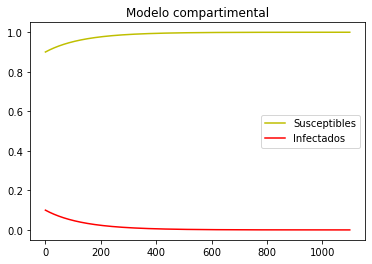

In [2]:
# Solución discreta del modelo
discreteSolutions = CompartmentalModelsInEDOS(listOfFunctions, initialValues)
discreteSolutions.n_iterations(1100)
# discreteSolutions.ModelSolutions()
discreteSolutions.plotSolutions(["Susceptibles", "Infectados"],["y","r"])
# discreteSolutions.PrintParameters()

In [3]:
# Parámetros del modelo
beta =  0.5 # Tasa de contagio
alpha =  0.2 # Tasa de recuperación (días que dura en promedio la enfermedad)

# Funciones del modelo
def S_function(values, beta=beta, mu = mu, theta = theta):
    # S' = -beta*S*I + mu*(1 - S) + theta*alpha*I
    return mu*(1 - values[0]) - beta*values[0]*values[1] + alpha*theta*values[1]

def I_function(values, alpha=alpha, beta=beta, mu = mu, theta = theta):
    # I' = beta*S*I - mu*I - theta*alpha*I - (1 - theta)*alpha*I 
    # I' = beta*S*I - mu*I - alpha*I
    return beta*values[0]*values[1] - values[1]*(alpha + mu)

def R_function(values, alpha=alpha, mu = mu, theta = theta):
    # R' = (1 - theta)*alpha*I - mu*R
    return (1 - theta)*alpha*values[1] 

listOfFunctions = [S_function, I_function, R_function]
initialValues = [0.9, 0.1, 0]

In [4]:
# Solución discreta del modelo
discreteSolutions = CompartmentalModelsInEDOS(listOfFunctions, initialValues)
discreteSolutions.n_iterations(1100)
# discreteSolutions.ModelSolutions()
discreteSolutions.PrintParameters()

h: 0.1 
n_iterations: 1100 
differentialEquations: [<function S_function at 0x00000268C16DAB80>, <function I_function at 0x00000268C39148B0>, <function R_function at 0x00000268C3914940>]
        


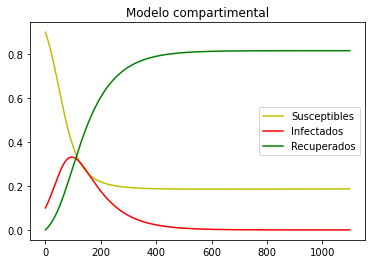

In [5]:
discreteSolutions.plotSolutions(["Susceptibles", "Infectados", "Recuperados"],["y", "r", "g"])